# Pretrain deep learning

In [166]:
!nvidia-smi

Thu Dec 22 13:14:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   41C    P8    34W / 240W |   7374MiB /  8192MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [167]:
import numpy as np
import matplotlib.pyplot as plt

def readBinDataset(filename):
    binDataset = np.load(filename)
    #print(bin)

    return binDataset

In [168]:
sequence = 0

In [169]:
#windows
binDataset=readBinDataset(r"D:\Ara\numpy_dataset_sequences\%02d_angleBin.npy" % sequence)

# linux
#binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

In [170]:
binDataset.shape

(4541, 3601)

In [171]:
binDataset=binDataset.reshape((len(binDataset), 3601,1 ))

In [172]:
binDataset = np.array([ consec_frames for consec_frames in zip(binDataset[0::], binDataset[1::])])

In [173]:
binDataset[0][0], binDataset[0][1]

(array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]),
 array([[ 0.        ],
        [ 0.        ],
        [73.48016344],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]))

In [174]:
binDataset.shape

(4540, 2, 3601, 1)

In [175]:
plt.rcParams["figure.figsize"] = (15,5.5)

In [176]:
binDataset[0].shape

(2, 3601, 1)

In [177]:
# windows
posePath = "D:\\Ara\\poses\\"
# linux
# posePath = "/mnt/d/Ara/poses/"
poseIdx = "%02d" % sequence
pose = poseIdx + ".txt"

In [178]:
filePath = posePath+pose
file = open(filePath,'r')

In [179]:
def isRotationMatrix(R):
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype=R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

In [180]:
import math
# from scipy.spatial.transform import Rotation as R

def rotationMatrixToEulerAngles(R):
    assert (isRotationMatrix(R))
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])
    singular = sy < 1e-6

    if not singular:
        x = math.atan2(R[2, 1], R[2, 2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1, 1])
        y = math.atan2(-R[2, 0], sy)
        z = 0

    return np.array([x, y, z])
    r = R.from_matrix(RMat)
    return r.as_euler('xyz')


In [181]:
def get6DoFPose(line):
    rotationTranslation = line.split()
    #print(rotationTranslation)
    
    
    homogenousCoord = np.array(rotationTranslation, dtype=np.float64).reshape((3,4))
    homogenousCoord = np.append(homogenousCoord, [[0,0,0,1]], axis=0)

    #print(homogenousCoord)
    R = homogenousCoord[0:3,0:3]
    pos = homogenousCoord[0:3,3]
    #print(R , pos)
    
    # assert(1==3)

    
    angles = rotationMatrixToEulerAngles(R)

    return np.concatenate((pos, angles)), homogenousCoord

In [182]:
import pykitti
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

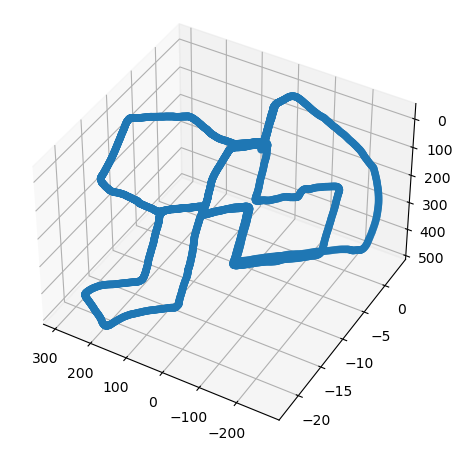

In [183]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x=np.array([])
y=np.array([])
z=np.array([])
yaw=np.array([])

basedir = 'D:\\dataset\\'
sequence_ = '%02d' % sequence
dataset = pykitti.odometry(basedir, sequence_)
for i in range(len(dataset.poses)):
    x=np.append(x,[dataset.poses[i][0][3]])
    y=np.append(y,[dataset.poses[i][1][3]])
    z=np.append(z,[dataset.poses[i][2][3]])

ax.scatter(x, y, z, marker='o')

t_xyz = np.c_[x,y,z]
ax.view_init(-140, 60)

plt.show()

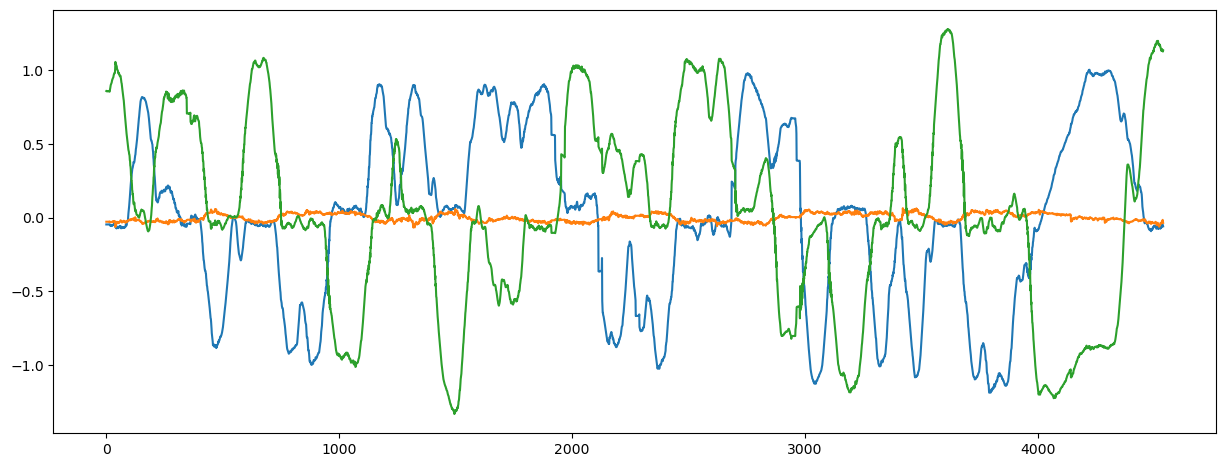

In [184]:
dt_xyz = t_xyz[1:] - t_xyz[0:-1]
plt.plot(dt_xyz)

In [185]:
dt_xz = dt_xyz[:,[0,2]]

0.81988264295328

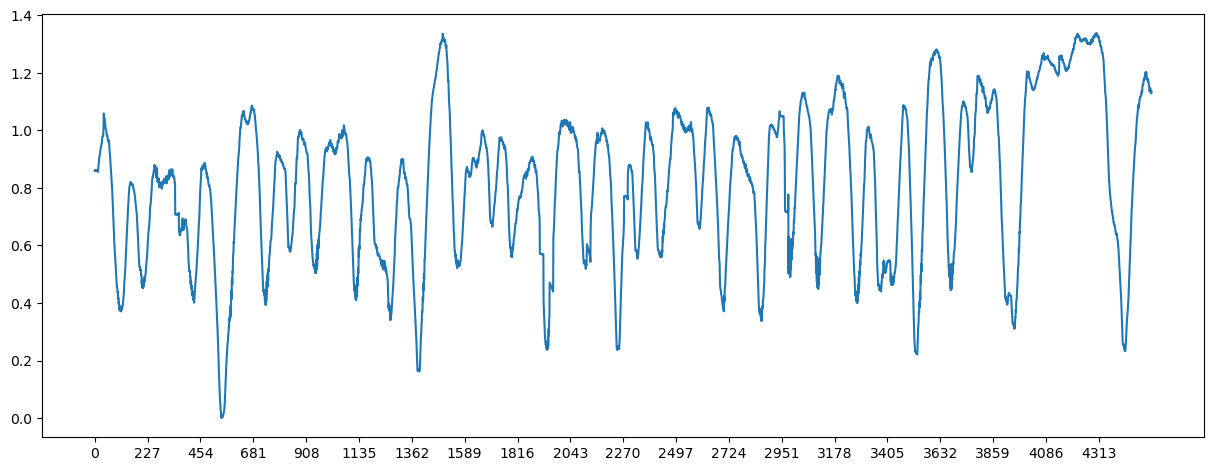

In [186]:
translation = np.sqrt( dt_xz[:,0]** 2 +  dt_xz[:,1]**2)
plt.xticks(range(0, len(translation),int(len(translation)/20)))
plt.plot(translation)
np.mean(translation)

In [187]:
# translation = translation + 0.28

In [188]:
# plt.xticks(range(0, len(translation),int(len(translation)/20)))
# plt.plot(translation)
# np.mean(translation)

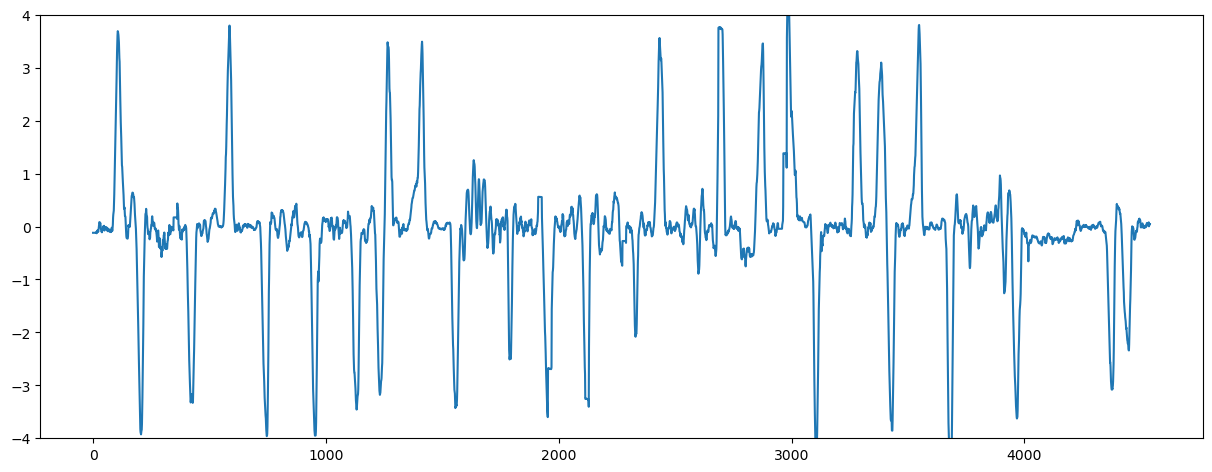

In [189]:
fig1 = plt.figure()
# arrow = plt.axes()
yaw_=np.zeros(len(dataset.poses))
for i in range(len(dataset.poses)):
    r= R.from_matrix([[dataset.poses[i][0][0], dataset.poses[i][0][1], dataset.poses[i][0][2]], [dataset.poses[i][1][0], dataset.poses[i][1][1], dataset.poses[i][1][2]], [dataset.poses[i][2][0], dataset.poses[i][2][1], dataset.poses[i][2][2]]])
    yaw=-r.as_rotvec()[1]
    yaw_[i]=yaw
    # arrow.arrow(x[i], y[i], math.sin(yaw), math.cos(yaw), head_width=0.05, head_length=0.1, fc='k', ec='k')
# plt.plot(np.rad2deg(yaw_))

diff_pitch = (yaw_[1::]-yaw_[:-1:])

# outlier detection
idxs = np.where((diff_pitch>np.deg2rad(300)) | (diff_pitch<np.deg2rad(-300)))

diff_pitch[idxs] =  diff_pitch[idxs] - np.deg2rad(360)  * np.sign(diff_pitch[idxs])

diff_pitch = -diff_pitch
plt.plot((np.rad2deg(diff_pitch)))
plt.ylim([-4, 4])
plt.show()

In [190]:
# len(t_xyz) , len(yaw)

label = np.array((translation,diff_pitch))
label = label.transpose()
binDataset.shape, label.shape

((4540, 2, 3601, 1), (4540, 2))

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaler = MinMaxScaler()
scaler.fit(label)

MinMaxScaler()

In [193]:
scaler.data_max_, scaler.data_min_

(array([1.33764467, 0.07641108]), array([ 0.00037821, -0.08327863]))

In [194]:
label = scaler.transform(label)

In [195]:
np.mean(translation)/np.mean(diff_pitch)

-588.1266565101677

In [196]:
sample_sz = 21
t_bin = np.zeros(sample_sz)
r_bin = np.zeros(sample_sz)

interval = 20

t_bin = np.zeros(sample_sz)
r_bin = np.zeros(sample_sz)
labelBinned = np.array([[t_bin,r_bin]])
for data in label:
    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)
    t_bin[int(((data[0]*interval)))] = 1
    r_bin[int(((data[1]*interval)))] = 1
    
    labelBinned = np.concatenate([labelBinned, np.array([np.array([t_bin, r_bin])])], axis=0)


In [197]:
labelBinned = labelBinned[1:]

In [198]:
labelBinned[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [199]:
label[0]

array([0.64280075, 0.50856127])

In [200]:
labelBinned.shape, label.shape

((4540, 2, 21), (4540, 2))

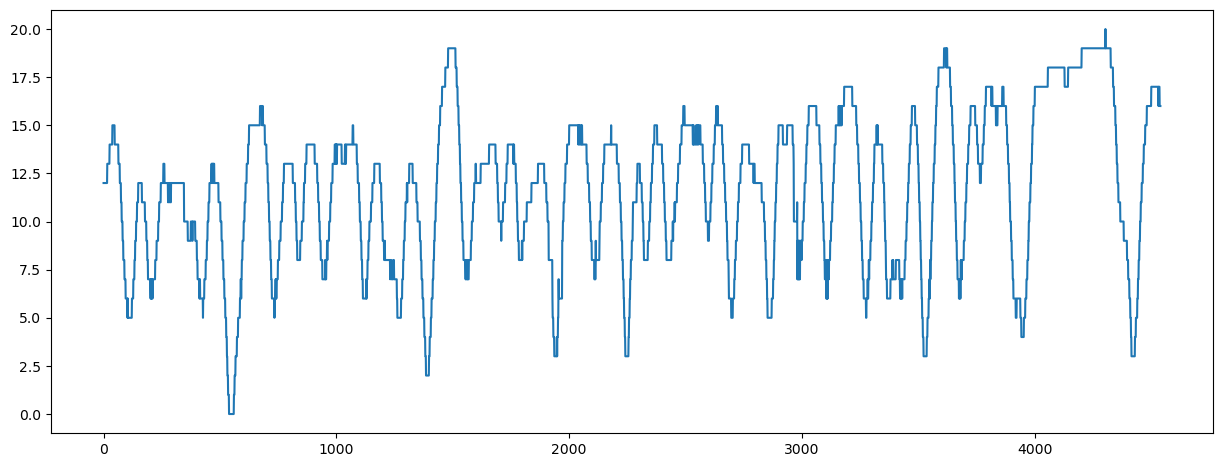

In [201]:
np.where(labelBinned[:,0] > 0)[1]
plt.plot(np.where(labelBinned[:,0] > 0)[1])

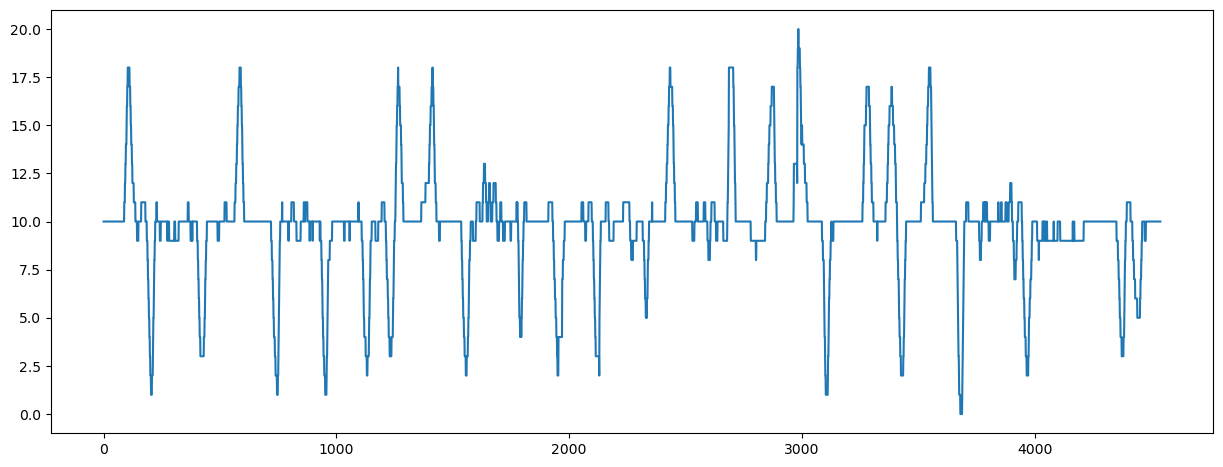

In [202]:
np.where(labelBinned[:,1] > 0)[1].shape
plt.plot(np.where(labelBinned[:,1] > 0)[1])

In [203]:
import tensorflow as tf

In [204]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import LSTM

In [205]:
binDataset[:4500].shape , label[:4500].shape, labelBinned[:4500].shape

((4500, 2, 3601, 1), (4500, 2), (4500, 2, 21))

In [206]:
binDataset = binDataset[:4500]
label = label[:4500]
labelBinned = labelBinned[:4500]

In [207]:
binDataset=binDataset.reshape((45,100,2,3601,1))
labelBinned = labelBinned.reshape((45,100,2,21))
# label = label.reshape((110,10,2))

In [208]:
binDataset.shape, labelBinned.shape

((45, 100, 2, 3601, 1), (45, 100, 2, 21))

In [209]:
translation = labelBinned[:,:,0,:]
rotation = labelBinned[:,:,1,:]

In [210]:
translation.shape, rotation.shape

((45, 100, 21), (45, 100, 21))

In [211]:
# with tf.device('/device:GPU:0'):
dataset = tf.data.Dataset.from_tensor_slices((binDataset, {"translation": translation, "rotation" : rotation} ))
# tf.compat.v1.disable_eager_execution()
# data = (binDataset,label)
# a = tf.compat.v1.placeholder(tf.float32,shape=binDataset.shape)
# dataset = tf.data.Dataset.from_tensor_slices(a)
# dataset = dataset.prefetch(buffer_size=1000)
# dataset = dataset.batch(128)
# iterator = tf.compat.v1.data.make_initializable_iterator(dataset)
# next_batch = iterator.get_next()
# with tf.compat.v1.Session() as sess:
#     sess.run(iterator.initializer, feed_dict={a: binDataset})

In [212]:
DATASET_SIZE = len(dataset)
DATASET_SIZE

45

In [213]:
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)
#.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
full_dataset = dataset.shuffle(buffer_size=100).prefetch(buffer_size=tf.data.AUTOTUNE)

train_data = full_dataset.take(train_size).batch(batch_size=4).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = full_dataset.skip(train_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = test_data.skip(test_size).batch(batch_size=4).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.take(test_size).batch(batch_size=4).prefetch(buffer_size=tf.data.AUTOTUNE)

In [214]:
train_data, val_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 2, 3601, 1), dtype=tf.float64, name=None), {'translation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None), 'rotation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None)})>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 2, 3601, 1), dtype=tf.float64, name=None), {'translation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None), 'rotation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None)})>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 2, 3601, 1), dtype=tf.float64, name=None), {'translation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None), 'rotation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None)})>)

In [215]:
train_one_sample=train_data.take(1)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, 100, 2, 3601, 1), dtype=tf.float64, name=None), {'translation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None), 'rotation': TensorSpec(shape=(None, 100, 21), dtype=tf.float64, name=None)})>

In [216]:
for datum, label in train_one_sample:
  print(f"""
  bin shape: {datum.shape}
  bin dtype: {datum.dtype}
  bin data : {datum}
  translation : {np.where(label['translation'] > 0)[1]}
  rotation : {np.where(label['rotation'] > 0)[1]}
        """)


  bin shape: (4, 100, 2, 3601, 1)
  bin dtype: <dtype: 'float64'>
  bin data : [[[[[24.63303158]
    [25.18686107]
    [ 0.        ]
    ...
    [ 0.        ]
    [24.2705899 ]
    [ 0.        ]]

   [[24.29302729]
    [24.6648628 ]
    [25.34687635]
    ...
    [23.74206092]
    [ 0.        ]
    [23.83142842]]]


  [[[24.29302729]
    [24.6648628 ]
    [25.34687635]
    ...
    [23.74206092]
    [ 0.        ]
    [23.83142842]]

   [[24.34503114]
    [24.29484144]
    [ 0.        ]
    ...
    [24.35212839]
    [24.54146748]
    [ 0.        ]]]


  [[[24.34503114]
    [24.29484144]
    [ 0.        ]
    ...
    [24.35212839]
    [24.54146748]
    [ 0.        ]]

   [[24.17902888]
    [24.17886361]
    [24.16686757]
    ...
    [23.84206494]
    [ 0.        ]
    [23.92543096]]]


  ...


  [[[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]


# CNN Model Creation

In [217]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = Sequential([
  Conv1D(filters=32, 
          kernel_size=3, # can also be (3, 3)
          strides=1,
          activation="relu",
          padding="same",
          input_shape=(2, 3601, 1), name="Conv1"), # first layer specifies input shape (height, width, colour channels)
  Conv1D(32, 3, 2,  padding="same",activation="relu", name="Conv2"),
    
  AveragePooling2D(pool_size=(1,3),
                                     strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool"),
  Conv1D(64, 3, 1,  padding="same",activation="relu", name="Conv3"),
  Conv1D(64, 3, 2,  padding="same",activation="relu", name="Conv4"),
  
  AveragePooling2D(pool_size=(1,3),
                                     strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool2"),
  
  Conv1D(128, 3, 1,  padding="same",activation="relu", name="Conv5"),
  Conv1D(128, 3, 2,  padding="same",activation="relu", name="Conv6"),

  AveragePooling2D(pool_size=(1,3),strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool3"),
  
    Flatten(),
  ])

In [218]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv1D)              (None, 2, 3601, 32)       128       
                                                                 
 Conv2 (Conv1D)              (None, 2, 1801, 32)       3104      
                                                                 
 AvgPool (AveragePooling2D)  (None, 2, 600, 32)        0         
                                                                 
 Conv3 (Conv1D)              (None, 2, 600, 64)        6208      
                                                                 
 Conv4 (Conv1D)              (None, 2, 300, 64)        12352     
                                                                 
 AvgPool2 (AveragePooling2D)  (None, 2, 100, 64)       0         
                                                                 
 Conv5 (Conv1D)              (None, 2, 100, 128)      

In [219]:
input_layer = tf.keras.layers.Input(shape=(None,2,3601,1), ragged=True)
cnn_model = model
# for layer in model.layers:
#     layer._inbound_nodes = []
#     cnn_model = layer(cnn_model)

In [220]:
cnn_model = TimeDistributed(cnn_model)(input_layer)

In [221]:
cnn_model = LSTM(1024,return_sequences=True)(cnn_model)

In [222]:
cnn_model = LSTM(1024, return_sequences=True)(cnn_model)

In [223]:
model1 = Dense(512, activation='relu')(cnn_model)
model2 = Dense(512, activation='relu')(cnn_model)

model1 = Dropout(0.3) (model1)
model2 = Dropout(0.3) (model2)


model1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model1)
model2 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model2)

model1 = Dropout(0.2) (model1)
model2 = Dropout(0.2) (model2)

# model1 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model1)
# model2 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model2)

# model1 = tf.keras.layers.Dropout(0.2) (model1)
# model2 = tf.keras.layers.Dropout(0.2) (model2)

model1 = Dense(21, name="translation",activation='softmax')(model1) # translate
model2 = Dense(21, name="rotation",activation='softmax')(model2) # yaw

# model1 = tf.keras.layers.Activation('softmax', name="translation")(model1)
# model2 = tf.keras.layers.Activation('softmax', name="rotation")(model2)

pre_model = tf.keras.Model(inputs=[input_layer], outputs=[model1, model2])
# losses = {
# 	"translation": CustomAccuracyTranslation(),
# 	"rotation": CustomAccuracyRotation(),
# }
# # losses = {"translation" : "mse", "rotation" : "mse"}
# loss_weights = {'translation' : 1, 'rotation' : 150}
# pre_model.compile(optimizer='adam',  loss=losses,loss_weights=loss_weights, metrics={"translation": ["mse"], "rotation": ["mse"]})
# pre_model.compile(loss = 'binary_crossentropy',
#               optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9),
#               metrics = ['accuracy'])

In [224]:
pre_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [225]:
pre_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, 2, 36  0           []                               
                                01, 1)]                                                           
                                                                                                  
 time_distributed_1 (TimeDistri  (None, None, 4096)  95776       ['input_2[0][0]']                
 buted)                                                                                           
                                                                                                  
 lstm_2 (LSTM)                  (None, None, 1024)   20975616    ['time_distributed_1[0][0]']     
                                                                                            

In [226]:
# !conda install graphviz -y
# !conda install pydot -y
# !conda install pydotplus -y

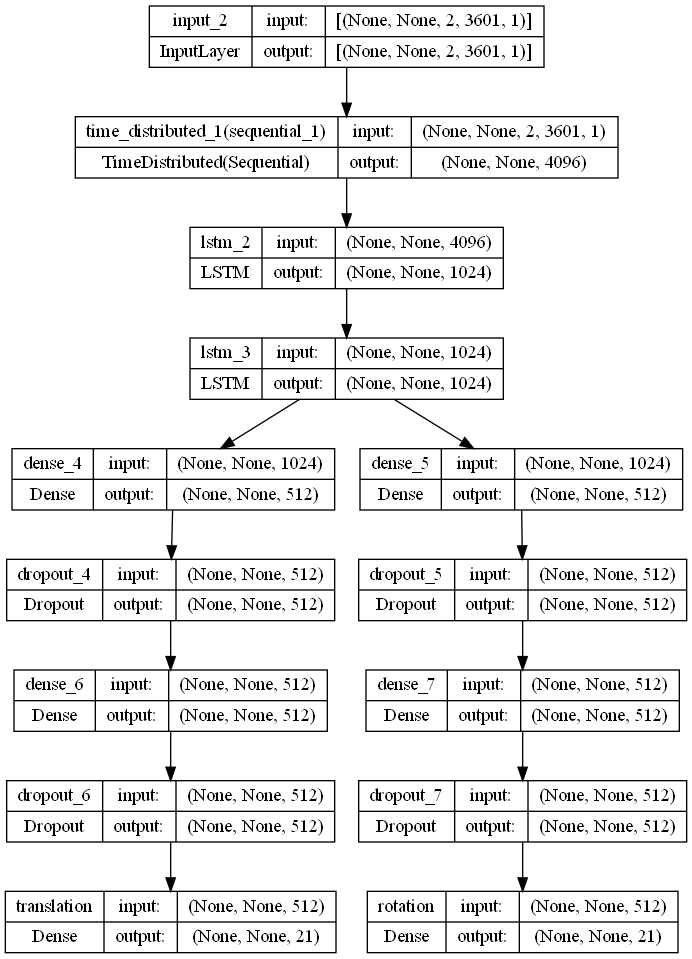

In [227]:
tf.keras.utils.plot_model(pre_model, show_shapes=True)

In [228]:
# train_data, val_data, test_data
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [229]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [230]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11360382068583474426
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5748293632
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13856912869681194517
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

# Tek sequence eğitimi

In [231]:
pre_model.output

[<KerasTensor: type_spec=RaggedTensorSpec(TensorShape([None, None, 21]), tf.float32, 1, tf.int64) (created by layer 'translation')>,
 <KerasTensor: type_spec=RaggedTensorSpec(TensorShape([None, None, 21]), tf.float32, 1, tf.int64) (created by layer 'rotation')>]

In [232]:
pre_model.fit(train_data,
              epochs=50,
            #   validation_data=val_data,
              verbose=1
              #validation_steps=int(0.25 * len(val_data))
              #callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_ext")]
             )

Epoch 1/50
8/8 [==============================] - 7s 125ms/step - loss: 6.1333 - translation_loss: 3.0500 - rotation_loss: 2.1191 - translation_accuracy: 0.0835 - rotation_accuracy: 0.4900
Epoch 2/50
8/8 [==============================] - 1s 123ms/step - loss: 5.7130 - translation_loss: 2.9078 - rotation_loss: 1.9470 - translation_accuracy: 0.0971 - rotation_accuracy: 0.4900
Epoch 3/50
8/8 [==============================] - 1s 122ms/step - loss: 5.5424 - translation_loss: 2.8528 - rotation_loss: 1.9249 - translation_accuracy: 0.0545 - rotation_accuracy: 0.5132
Epoch 4/50
8/8 [==============================] - 1s 123ms/step - loss: 5.2652 - translation_loss: 2.8022 - rotation_loss: 1.7806 - translation_accuracy: 0.0868 - rotation_accuracy: 0.5255
Epoch 5/50
8/8 [==============================] - 1s 123ms/step - loss: 4.9835 - translation_loss: 2.7772 - rotation_loss: 1.5938 - translation_accuracy: 0.0929 - rotation_accuracy: 0.5435
Epoch 6/50
8/8 [==============================] - 1s 12

In [233]:
predictions = pre_model.predict(test_data)

2/2 [==============================] - 2s 62ms/step


In [234]:
prediction_train = pre_model.predict(train_data)

8/8 [==============================] - 0s 57ms/step


# Örnek Batch verisi kontrolü

In [235]:
train_batch = train_data.as_numpy_iterator()

In [236]:
example_trained_data = train_batch.next()

In [237]:
example_trained_data[0].shape # input

(4, 100, 2, 3601, 1)

In [238]:
example_trained_data[1]['translation'].shape, example_trained_data[1]['rotation'].shape

((4, 100, 21), (4, 100, 21))

In [239]:
example_bin_input_time_distributed = example_trained_data[0][0]
example_bin_input_time_distributed.shape
example_bin_output_time_distributed_translation = example_trained_data[1]['translation'][0]
example_bin_output_time_distributed_rotation = example_trained_data[1]['rotation'][0]
example_bin_output_time_distributed_translation[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [240]:
def plotAngleBin(ax,angleBin):
    ax.cla()
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(0.00000000000001)
    plt.show()

In [242]:
%matplotlib qt
# %matplotlib inline
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

for i in range(len(example_bin_input_time_distributed)):
    fig.suptitle("Zaman Serisinde Verilen iki resim")
    text = fig.text(0.1, 0.1,"translation:{translation} rotation:{rotation} ".format(translation=np.argmax(example_bin_output_time_distributed_translation[i]), rotation=np.argmax(example_bin_output_time_distributed_rotation[i])))
    plotAngleBin(axs[0], example_bin_input_time_distributed[i][0])
    
    plotAngleBin(axs[1], example_bin_input_time_distributed[i][1])
    text.remove()
    # print(example_bin_input_time_distributed[i][0] == example_bin_input_time_distributed[i][1])


# Modelden elde edilen çıktıların doğruluk kontrolü

In [ ]:
prediction_train[1].shape

(31, 100, 21)

In [79]:
len(prediction_train), len(train_data)

(2, 8)

In [158]:
X_train = list(map(lambda x: x[0], train_data))
y_train = list (map(lambda x: x[1], train_data))

In [159]:
X_train[6].shape

TensorShape([4, 100, 2, 3601, 1])

In [160]:
y_train[6]['translation'].shape

TensorShape([4, 100, 21])

In [161]:
prediction_train[0].shape

(31, 100, 21)

In [162]:
tf.concat([i['translation'] for i in y_train], axis=0)[0].shape

TensorShape([100, 21])

In [163]:
np.argmax(tf.concat([i['translation'] for i in y_train], axis=0)[0], axis=1)

array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 17, 17,
       17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15,
       15, 16, 16, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 14, 14,
       13, 13, 13, 13, 12, 12, 12, 11, 11, 10, 10, 10, 10,  9,  9],
      dtype=int64)

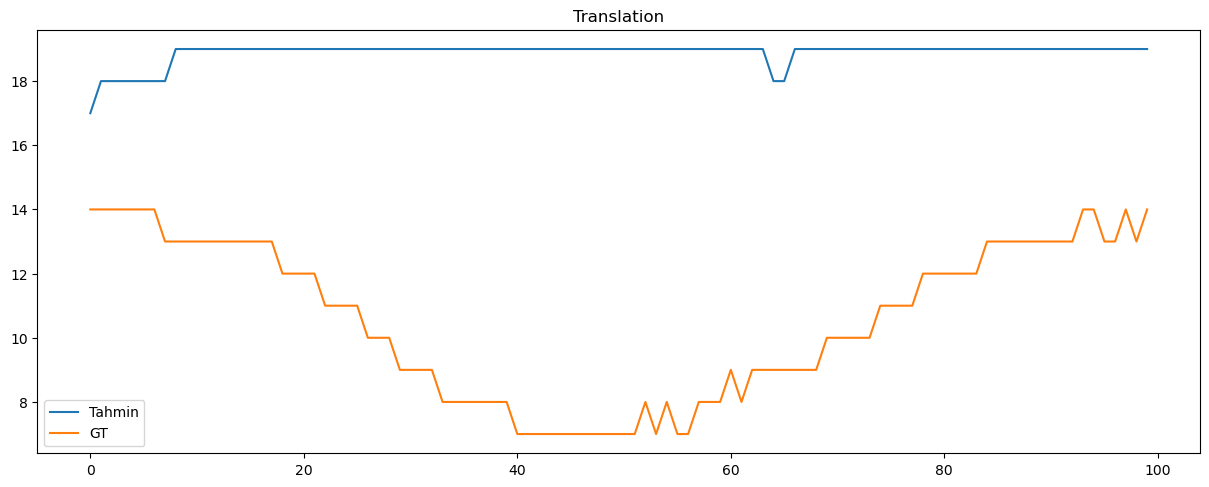

In [164]:
%matplotlib inline
plt.plot(np.argmax(prediction_train[0][3], axis=1),label="Tahmin")
plt.plot(np.argmax(tf.concat([i['translation'] for i in y_train], axis=0)[3], axis=1), label="GT")

plt.title("Translation")
#plt.xlim([0,50])

plt.legend()
plt.show()

In [165]:
%matplotlib quit
for i in ():
    plt.plot(np.argmax(prediction_train[1][0], axis=1),label="Tahmin")
    plt.plot(np.argmax(tf.concat([i['translation'] for i in y_train], axis=0)[0], axis=1), label="GT")

    plt.title("Translation")
    #plt.xlim([0,50])

    plt.legend()
    plt.show()

KeyError: 'quit'

In [ ]:
plt.plot(np.argmax(prediction_train[1], axis=1),label="Tahmin")
plt.plot(np.argmax(tf.concat([i['rotation'] for i in y_train], axis=0), axis=1), label="GT")


plt.title("Rotation")
plt.show()

In [ ]:
X_test = list(map(lambda x: x[0], test_data))
y_test = list(map(lambda x: x[1], test_data))

In [ ]:
plt.plot(np.argmax(predictions[0], axis=1),label="Tahmin")
plt.plot(np.argmax(tf.concat([i['translation'] for i in y_test], axis=0), axis=1), label="GT")

plt.title("Translation")
#plt.xlim([0,50])

plt.legend()
plt.show()

In [ ]:
plt.plot(np.argmax(predictions[1], axis=1),label="Tahmin")
plt.plot(np.argmax(tf.concat([i['rotation'] for i in y_test], axis=0), axis=1), label="GT")
plt.legend()
#plt.xlim([0,10])
plt.title("rotation")
plt.show()

#  K-Fold CNN training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pykitti
import math 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import tensorflow as tf
def readBinDataset(filename):
    binDataset = np.load(filename)
    #print(bin)

    return binDataset

In [ ]:
total_dataset_sz = 11
binDataset_ = []

In [ ]:
#windows
for sequence in range(total_dataset_sz):
    binDataset_.append(readBinDataset(r"D:\Ara\numpy_dataset_sequences\%02d_angleBin.npy" % sequence))
    binDataset_[sequence]=binDataset_[sequence].reshape((len(binDataset_[sequence]), 3601,1 ))
    binDataset_[sequence] = np.array([ consec_frames for consec_frames in zip(binDataset_[sequence][0::], binDataset_[sequence][1::])])

# linux
#binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

In [ ]:
binDataset_

In [ ]:
binDataset_[sequence].shape

In [ ]:
label_ = []
for sequence in range(total_dataset_sz):
    basedir = 'D:\\dataset\\'
    sequence_ = '%02d' % sequence
    dataset = pykitti.odometry(basedir, sequence_)
    
   
    x=np.array([])
    y=np.array([])
    z=np.array([])
    yaw=np.array([])

    fig = plt.figure(sequence)
    ax = fig.add_subplot(projection='3d' )
    ax.set_title(str(sequence))
    for i in range(len(dataset.poses)):
        x=np.append(x, [dataset.poses[i][0][3]])
        y=np.append(y, [dataset.poses[i][1][3]])
        z=np.append(z, [dataset.poses[i][2][3]])

    ax.scatter(x, y, z, marker='o')
    
    ax.view_init(-140, 60)
    plt.pause(0.1)
    plt.clf()

    t_xyz = np.c_[x, y, z]
    dt_xyz = t_xyz[1:] - t_xyz[0:-1]
    dt_xz = dt_xyz[:,[0,2]]
    translation_ = np.sqrt( dt_xz[:,0]** 2 +  dt_xz[:,1]**2)

    translation_ += 0.28 
    
    
    fig1 = plt.figure()
    yaw_=np.zeros(len(dataset.poses))
    for i in range(len(dataset.poses)):
        r= R.from_matrix([[dataset.poses[i][0][0], dataset.poses[i][0][1], dataset.poses[i][0][2]], [dataset.poses[i][1][0], dataset.poses[i][1][1], dataset.poses[i][1][2]], [dataset.poses[i][2][0], dataset.poses[i][2][1], dataset.poses[i][2][2]]])
        yaw=-r.as_rotvec()[1]
        yaw_[i]=yaw
    # plt.plot(np.rad2deg(yaw_))

    diff_pitch_ = -(yaw_[1::]-yaw_[:-1:])

    # outlier detection
    idxs = np.where((diff_pitch_>np.deg2rad(300)) | (diff_pitch_<np.deg2rad(-300)))

    diff_pitch_[idxs] =  diff_pitch_[idxs] - np.deg2rad(360)  * np.sign(diff_pitch_[idxs])

    label_.append(np.transpose(np.array((translation_,diff_pitch_))))
    
    plt.plot((np.rad2deg(diff_pitch_)))
    plt.pause(0.001)
    plt.clf()
#     plt.ylim([-4, 4])
#     plt.show()

In [ ]:
len(binDataset_[3][0][1])

In [ ]:
binDataset_[0].shape, label_[0].shape

In [ ]:
binDataset_ = np.array(binDataset_)
label_ = np.array(label_)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
num_folds = len(binDataset_)

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

verbosity = 1
no_epochs = 10
batch_size = 4

In [ ]:
from keras import backend as K
import keras

def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
            continue
        for k, initializer in layer.__dict__.items():
            if "initializer" not in k:
                continue
            # find the corresponding variable
            var = getattr(layer, k.replace("_initializer", ""))
            var.assign(initializer(var.shape, var.dtype))

In [ ]:
reset_weights(pre_model)
keras.backend.clear_session()

In [ ]:
fold_no = 1

In [ ]:
acc_per_fold = []

In [ ]:
loss_per_fold = []

In [ ]:
def plotAngleBin(ax,angleBin):
    
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(0.00000000000001)
    plt.show()

In [ ]:
for train, test in kfold.split(binDataset_, label_):
    train_data_ = np.concatenate(binDataset_[train], axis=0)
    train_label_ = np.concatenate(label_[train], axis=0)
    
    dataset_ = tf.data.Dataset.from_tensor_slices((train_data_, train_label_))
    full_dataset_ = dataset_.shuffle(buffer_size=100).batch(batch_size=batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
batch = full_dataset_.as_numpy_iterator()

In [ ]:
batch_ = batch.next()

In [ ]:
train_data_[0].shape, binDataset_[0].shape, batch_[0].shape batch_[1].shape

In [ ]:
ax = plt.axes()


plotAngleBin(ax,batch_[0][0][0])

ax2 = plt.axes()

plotAngleBin(ax2,batch_[0][0][1])


In [ ]:
np.count_nonzero( train_data_[20][0] == train_data_[20][1] )

In [ ]:
for train, test in kfold.split(binDataset_, label_):
    
    
    train_data_ = np.concatenate(binDataset_[train], axis=0)
    train_label_ = np.concatenate(label_[train], axis=0)
    dataset_ = tf.data.Dataset.from_tensor_slices((train_data_, train_label_))
    full_dataset_ = dataset_.shuffle(buffer_size=100).batch(batch_size=batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

    history=pre_model.fit(full_dataset_,
              epochs=no_epochs,
              verbose=verbosity)
    
    
    test_data_ = np.concatenate(binDataset_[test], axis=0)
    test_label_ = np.concatenate(label_[test], axis=0)
    # Generate generalization metrics
    scores = pre_model.evaluate(test_data_, test_label_, verbose=0)
    print(f'Score for fold {fold_no}: {pre_model.metrics_names[0]} of {scores[0]}; {pre_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    break

In [ ]:
fold_no

In [ ]:
plt.plot(acc_per_fold)

In [ ]:
plt.plot(loss_per_fold)

# Tek tek değerlendir

In [ ]:
X_train = list(map(lambda x: x[0], train_data))
y_train = list (map(lambda x: x[1], train_data))

In [ ]:
predictions = pre_model.predict(test_data)
prediction_train = pre_model.predict(train_data)

In [ ]:
plt.plot(prediction_train[0], label="Tahmin")
plt.plot(tf.concat(y_train,0)[:,0], label="GT")
plt.title("Translation")
#plt.xlim([0,50])

plt.legend()
plt.show()

In [ ]:
plt.plot(prediction_train[1], label="Tahmin")
plt.plot(tf.concat(y_train,0)[:,1], label="GT")
plt.legend()
#plt.xlim([0,10])
plt.title("rotation")
plt.show()

In [ ]:
X_test = list(map(lambda x: x[0], test_data))
y_test = list(map(lambda x: x[1], test_data))

In [ ]:
plt.plot(predictions[0],label="Tahmin")
plt.plot(tf.concat(y_test,0)[:,0], label="GT")
plt.title("Translation")
plt.legend()
#plt.xlim([0,10])
plt.show()

In [ ]:
plt.plot(predictions[1], label="Tahmin")
plt.plot(tf.concat(y_test,0)[:,1], label="GT")
plt.legend()
#plt.xlim([0,10])
plt.title("rotation")
plt.show()

# Example CNN LSTM architecture

CNN Model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import LSTM

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
from numpy import zeros, array
from random import randint
from random import random
from matplotlib import pyplot

# generate the next frame in the sequence
def next_frame(last_step, last_frame, column):
    # define the scope of the next step
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    # choose the row index for the next step
    step = randint(lower, upper)
    # copy the prior frame
    frame = last_frame.copy()
    # add the new step
    frame[step, column] = 1
    return frame, step
# generate a sequence of frames of a dot moving across an image
def build_frames(size):
    frames = list()
    # create the first frame
    frame = zeros((size,size))
    step = randint(0, size-1)
    # decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    # create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right



In [ ]:
# generate sequence of frames
size = 5
frames, right = build_frames(size)

In [ ]:
# plot all feames
pyplot.figure()
for i in range(size):
    # create a grayscale subplot for each frame
    pyplot.subplot(1, size, i+1)
    pyplot.imshow(frames[i], cmap= 'Greys' )
    # turn of the scale to make it cleaer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # show the plot
    pyplot.show()

Generate Dataset

In [ ]:
# generate multiple sequences of frames and reshape for network input
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    # resize as [samples, timesteps, width, height, channels]
    X = array(X).reshape(n_patterns, size, size, size, 1)
    y = array(y).reshape(n_patterns, 1)
    return X, y

# Model

define the model


In [ ]:
# configure problem
size = 50
# define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2,2), activation= 'relu' ),
input_shape=(None,size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'acc' ])
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

fit model

In [ ]:
X, y = generate_examples(size, 5000)
model.fit(X, y, batch_size=32, epochs=1)

evaluate model

In [ ]:
y

In [ ]:
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose=0)
print( "loss: %f, acc: %f " % (loss, acc*100))

prediction on new data

In [ ]:
X, y = generate_examples(size, 1)
# yhat = model.predict_classes(X, verbose=0)
yhat = (model.predict(X) > 0.5).astype("int32")
expected = "Right" if y[0]==1 else "Left"
predicted = "Right" if yhat[0]==1 else "Left"
print( "Expected: %s, Predicted: %s" % (expected, predicted) )

Image Initialization

In [ ]:
from numpy import zeros
frame = zeros((10,10))

In [ ]:
from random import randint
step = randint(0, 10-1)

In [ ]:
from random import random
right = 1 if random() < 0.5 else 0
col = 0 if right else 9

In [ ]:
frame[step, col] = 1

Adding Steps

In [ ]:
lower = max(0, last_step-1)
upper = min(10-1, last_step+1)
step = randint(lower, upper)


In [ ]:
column = i if right else size-1-i
frame = last_frame.copy()
frame[step, column] = 1

# tüm labelları oku ve min max scaling yap

minimum ve maksimum labellı verileri tüm veri seti içerisinden bul.

In [ ]:
import pykitti
import numpy as np
total_dataset_sz = 11

In [ ]:
for sequence in range(total_dataset_sz):
    basedir = 'D:\\dataset\\'
    sequence_ = '%02d' % sequence
    dataset = pykitti.odometry(basedir, sequence_)
    
   
    x=np.array([])
    y=np.array([])
    z=np.array([])
    yaw=np.array([])

 
    t_xyz = np.c_[x, y, z]
    dt_xyz = t_xyz[1:] - t_xyz[0:-1]
    dt_xz = dt_xyz[:,[0,2]]
    translation_ = np.sqrt( dt_xz[:,0]** 2 +  dt_xz[:,1]**2)

    translation_ += 0.28 
    
    
    
    yaw_=np.zeros(len(dataset.poses))
    for i in range(len(dataset.poses)):
        r= R.from_matrix([[dataset.poses[i][0][0], dataset.poses[i][0][1], dataset.poses[i][0][2]], [dataset.poses[i][1][0], dataset.poses[i][1][1], dataset.poses[i][1][2]], [dataset.poses[i][2][0], dataset.poses[i][2][1], dataset.poses[i][2][2]]])
        yaw=-r.as_rotvec()[1]
        yaw_[i]=yaw
    # plt.plot(np.rad2deg(yaw_))

    diff_pitch_ = -(yaw_[1::]-yaw_[:-1:])

    # outlier detection
    idxs = np.where((diff_pitch_>np.deg2rad(300)) | (diff_pitch_<np.deg2rad(-300)))

    diff_pitch_[idxs] =  diff_pitch_[idxs] - np.deg2rad(360)  * np.sign(diff_pitch_[idxs])

    label_.append(np.transpose(np.array((translation_,diff_pitch_))))
    


In [ ]:
binDataset_[0].shape, label_[0].shape

# classificationa örnekle

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt


# Odometri Sonucunu Çizdir

# Modeli Ubuntuya Göndermek İçin Kaydet

# Laser verisini gazebodan al

# Laser verisini kutula ve modele değerlendirme olarak at

# Çıkan sonuçtan artımlı odometri çiz

# Deterministik Modeli Kur ve Karşılaştır